In [2]:
import scanpy as sc

from bio_grns import (
    Trajectory,
    GRNSimulator
)

In [3]:
### Construct a trajectory ###

trajectory_1 = Trajectory(
    500,                           ### Length of trajectory in time units (minutes)
    primary_trajectory = True,     ### Trajectory is primary (represents wall clock)
    force_positive = True,         ### Return absolute value of activity
    latent_network_sparsity = 0.5, ### Ratio of TFs which will be influenced by this trajectory
    name = "Development"           ### Name this trajectory
)

trajectory_1.add_pattern(
    'random', 0.5, 0.05, 0.2
) ### Random walk starting with an activity of 1 and steps between 0.05 and 0.2

trajectory_1.add_pattern(
    'cyclic', 0, 0.01, 0.5
) ### Cycle from zero to one (halfway through the trajectory) to zero again with random step sizes between 0.01 and 0.5

trajectory_1.add_pattern(
    'updown', .8, .2, (0.01, 0.5)
) ### Cycle from .8 to 1 (20% into the trajectory) to 0 with random step sizes between 0.01 and 0.5


In [30]:
### Create a simulator ###

sim = GRNSimulator(
    200,                        ### Number of genes
    20,                         ### Number of genes which are regulators
    212,                          ### Random number for seeding generator
    n_samples = 1000,            ### Number of samples to generate
    counts_per_sample = 1000,    ### Number of read counts per sample
    debug=True
)

sim.add_trajectory(trajectory_1)   ### Add the trajectory to the simulator
sim.set_biophysical_parameters(
    halflife_limits = (20, 200)    ### Set boundries for halflife (to calculate decay constant)
)
sim.set_network_parameters(
    regulatory_network_sparsity = 0.15,       ### Set the sparsity in the target -> regulator network
    regulatory_network_activator_ratio = 0.8  ### Set the ratio of positive target -> regulator network edges
)

sim.simulate()

2023-03-03 11:26:09,469 Generating trajectory -> regulator networks
2023-03-03 11:26:09,475 Generated (20, 3) network with 9 nonzero edges
2023-03-03 11:26:09,476 Generated network for Development
2023-03-03 11:26:09,478 Simulating gene biophysical parameters
2023-03-03 11:26:09,480 Simulating regulatory network
2023-03-03 11:26:09,490 Generated (200, 20) network with 591 nonzero edges
2023-03-03 11:26:09,491 Simulating gene expression over time


In [31]:
adata = sim.generate_count_data()

2023-03-03 11:26:10,715 Simulating count data from trajectories
100%|██████████| 1000/1000 [00:00<00:00, 4247.31it/s]


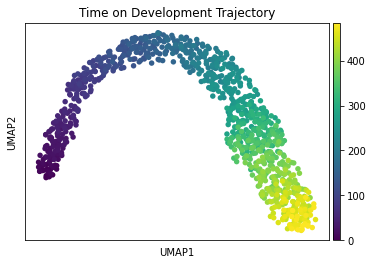

In [32]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color="Development", title="Time on Development Trajectory")

In [36]:
(adata.uns['network'] != 0).sum(axis=1).sum()

591